Install required libraries 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl

# from matplotlib.colors import LinearSegmentedColormap


Import Data

In [35]:
url = 'https://raw.githubusercontent.com/ttran293/Vietnam-Happiness-Score/main/world-happiness-report.csv'
url2= 'https://raw.githubusercontent.com/ttran293/Vietnam-Happiness-Score/main/world-happiness-report-2021.csv'
data = pd.read_csv(url)
data_2021 = pd.read_csv(url2)

Print Data



In [36]:
print(data_2021)

    Country name  ... Dystopia + residual
0        Finland  ...               3.253
1        Denmark  ...               2.868
2    Switzerland  ...               2.839
3        Iceland  ...               2.967
4    Netherlands  ...               2.798
..           ...  ...                 ...
144      Lesotho  ...               1.800
145     Botswana  ...               0.648
146       Rwanda  ...               1.095
147     Zimbabwe  ...               1.205
148  Afghanistan  ...               1.895

[149 rows x 20 columns]


In [37]:
pd.set_option('display.max_rows', None)
data_2021.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [38]:
data_2021.shape


(149, 20)

In [39]:
data_2021.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [40]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

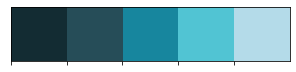

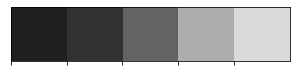

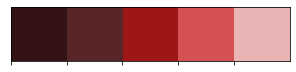

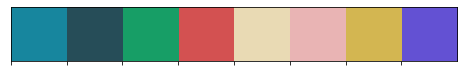

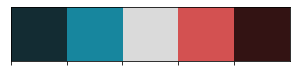

In [41]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

In [42]:
SEA = data_2021[data_2021['Regional indicator'] == "Southeast Asia"]['Country name'].to_list()


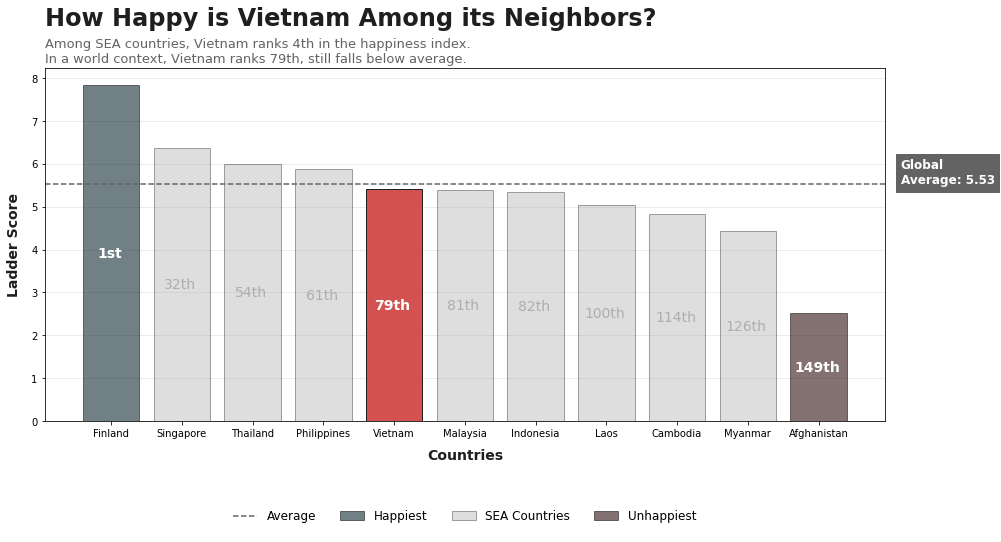

In [43]:
#@title
df = data_2021[data_2021['Country name'].isin(SEA)]
data_2021_top = data_2021.iloc[0:1]
data_2021_bot = data_2021.iloc[-1]
mean_score = data_2021['Ladder score'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Ladder score'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Ladder score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Ladder score'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Ladder Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[3].set_alpha(1)
bars1[3].set_color(colors_red[3])
bars1[3].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 3 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="How Happy is Vietnam Among its Neighbors?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Vietnam ranks 4th in the happiness index.\nIn a world context, Vietnam ranks 79th, still falls below average.", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

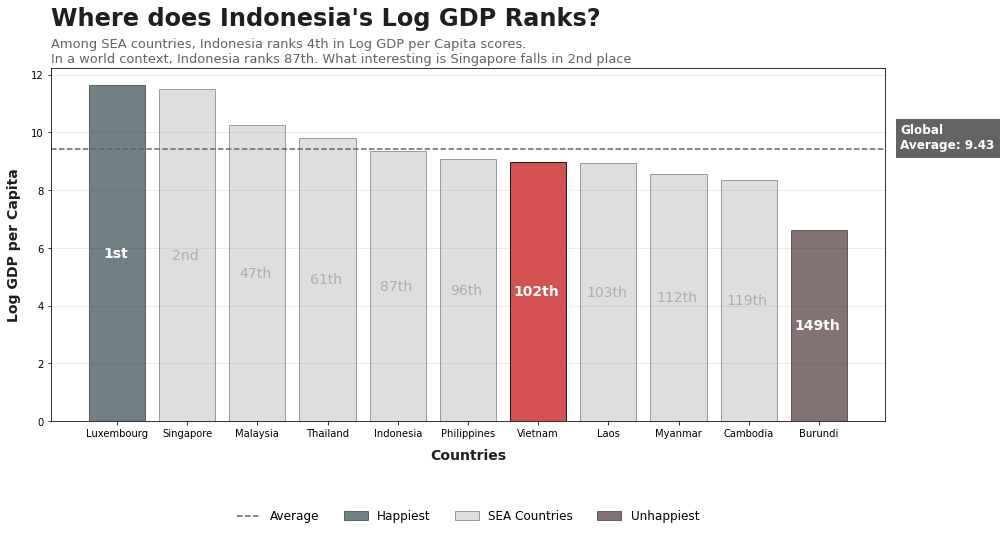

In [44]:
#@title
df_glob = data_2021.sort_values("Logged GDP per capita", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Logged GDP per capita'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Logged GDP per capita'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Logged GDP per capita'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Logged GDP per capita'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Log GDP per Capita", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[5].set_alpha(1)
bars1[5].set_color(colors_red[3])
bars1[5].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i == 0 : 
        ax.text(
            s=f"{sea_idx[i]}nd",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    elif i != 5 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Indonesia's Log GDP Ranks?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Indonesia ranks 4th in Log GDP per Capita scores.\nIn a world context, Indonesia ranks 87th. What interesting is Singapore falls in 2nd place", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

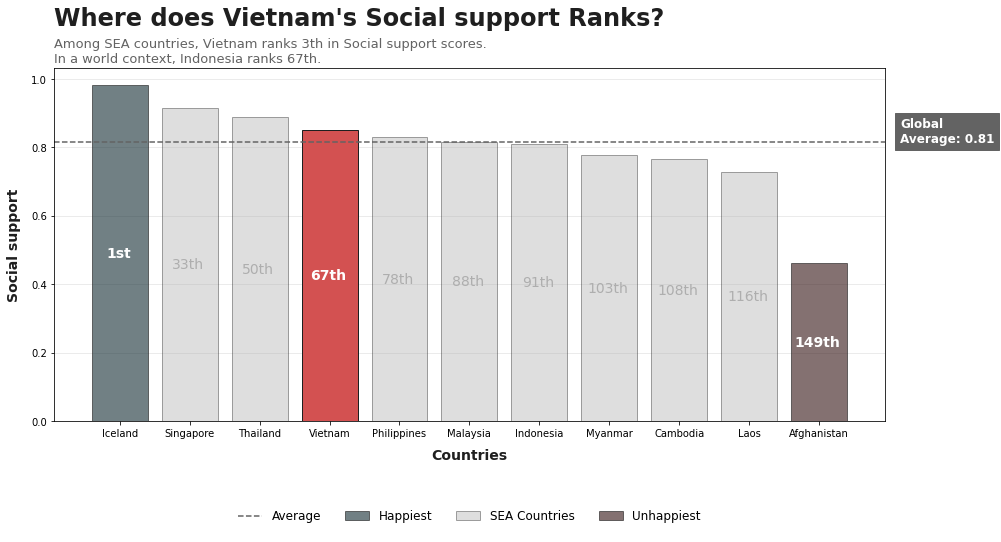

In [45]:
#@title
df_glob = data_2021.sort_values("Social support", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Social support'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Social support'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Social support'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Social support'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Happiest", "SEA Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Social support", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[2].set_alpha(1)
bars1[2].set_color(colors_red[3])
bars1[2].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 2 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Vietnam's Social support Ranks?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Vietnam ranks 3th in Social support scores.\nIn a world context, Indonesia ranks 67th.", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

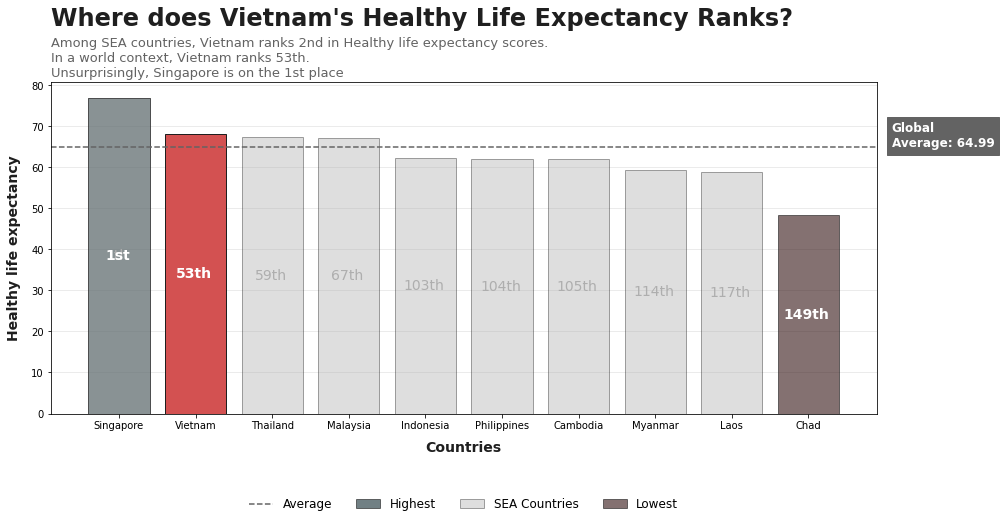

In [46]:
#@title
df_glob = data_2021.sort_values("Healthy life expectancy", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Healthy life expectancy'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Healthy life expectancy'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Healthy life expectancy'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Healthy life expectancy'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Highest", "SEA Countries", "Lowest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Healthy life expectancy", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[1].set_alpha(1)
bars1[1].set_color(colors_red[3])
bars1[1].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 1 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Vietnam's Healthy Life Expectancy Ranks?", ha='left', x=xmin, y=ymax*1.17, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Vietnam ranks 2nd in Healthy life expectancy scores.\nIn a world context, Vietnam ranks 53th.\nUnsurprisingly, Singapore is on the 1st place", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

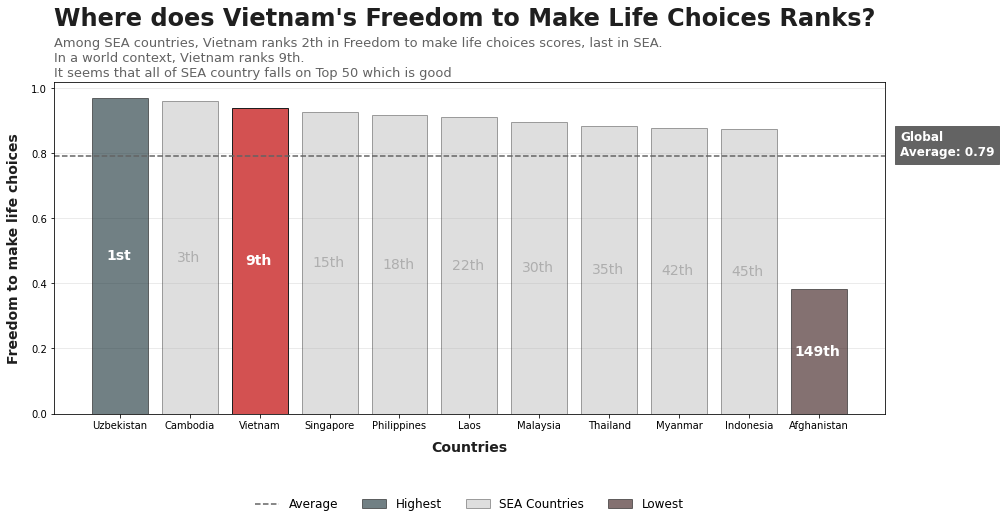

In [47]:
#@title
df_glob = data_2021.sort_values("Freedom to make life choices", ascending=False).reset_index(drop=True)
df = df_glob[df_glob['Country name'].isin(SEA)]
data_2021_top = df_glob.iloc[0:1]
data_2021_bot = df_glob.iloc[-1]
mean_score = df_glob['Freedom to make life choices'].mean()
sea_idx = list(df.index + 1)

fig, ax = plt.subplots(figsize=(14, 8))

bars0 = ax.bar(data_2021_top['Country name'], data_2021_top['Freedom to make life choices'], color=colors_blue[0], alpha=0.6, edgecolor=colors_dark[0])
bars1 = ax.bar(df['Country name'], df['Freedom to make life choices'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])
bars2 = ax.bar(data_2021_bot['Country name'], data_2021_bot['Freedom to make life choices'], color=colors_red[0], alpha=0.6, edgecolor=colors_dark[0])
line  = ax.axhline(mean_score, linestyle='--', color=colors_dark[2])

ax.legend(["Average", "Highest", "SEA Countries", "Lowest"], loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Freedom to make life choices", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Global\nAverage: {:.2f}".format(mean_score),
    x=xmax*1.02,
    y=mean_score,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)
# Vietnam settings
bars1[1].set_alpha(1)
bars1[1].set_color(colors_red[3])
bars1[1].set_edgecolor(colors_dark[0])

for i, bar in enumerate(bars1) : 
    x=bar.get_x()
    y=bar.get_height()
    if i != 1 : 
        ax.text(
            s=f"{sea_idx[i]}th",
            va='center', ha='center', 
            x=x+0.38, y=y/2,
            color=colors_dark[3],
            fontsize=14,
        )
    else : 
        ax.text(
        s=f"{sea_idx[i]}th",
        va='center', ha='center', 
        x=x+0.38, y=y/2,
        color='white',
        fontsize=14,
        fontweight='bold'
    )
        
for i, bar in enumerate(bars0) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s=f"1st",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
    
for i, bar in enumerate(bars2) : 
    x=bar.get_x(),
    y=bar.get_height(),

    ax.text(
        s="149th",
        va='center', ha='center', 
        x=x[0]+0.38, y=y[0]/2,
        color="white",
        fontsize=14,
        fontweight='bold',
        alpha=1,
    )
        
plt.text(s="Where does Vietnam's Freedom to Make Life Choices Ranks?", ha='left', x=xmin, y=ymax*1.17, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("Among SEA countries, Vietnam ranks 2th in Freedom to make life choices scores, last in SEA.\nIn a world context, Vietnam ranks 9th.\nIt seems that all of SEA country falls on Top 50 which is good", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

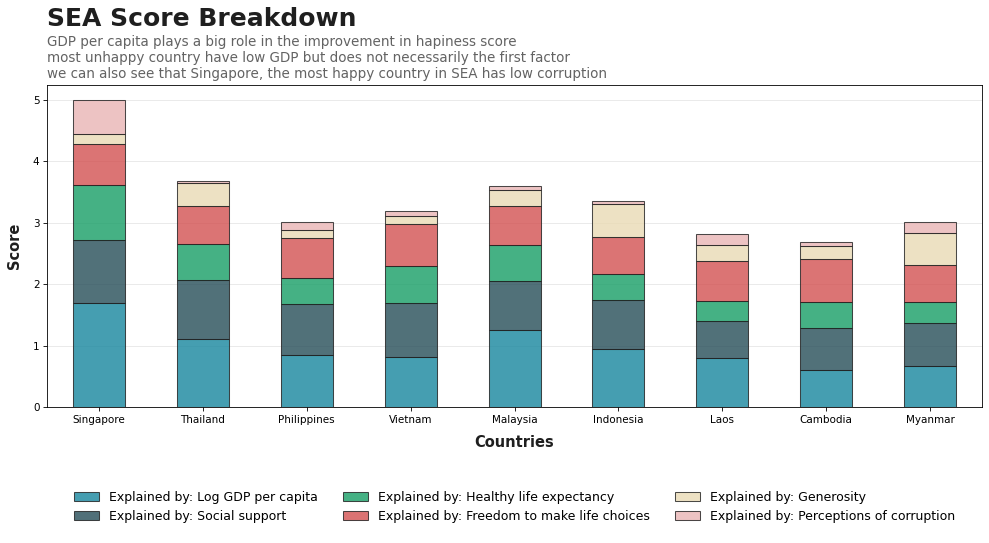

In [48]:
#@title
components = list(data_2021.columns[-7:-1])
df = data_2021[data_2021['Country name'].isin(SEA)]
df = df[["Country name"] + components].set_index("Country name")

fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_mix[0:7], alpha=0.8, edgecolor=colors_dark[0], rot=0)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="SEA Score Breakdown", ha='left', x=xmin, y=ymax*1.18, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("GDP per capita plays a big role in the improvement in hapiness score\nmost unhappy country have low GDP but does not necessarily the first factor\nwe can also see that Singapore, the most happy country in SEA has low corruption", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

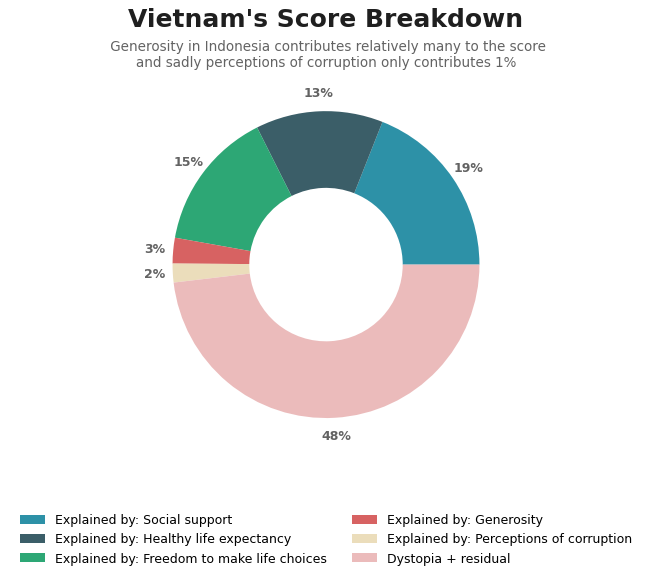

In [57]:
#@title
components = list(data_2021.columns[-7:-1])
df = data_2021[data_2021['Country name'].isin(SEA)]
df = df[["Country name"] + components].set_index("Country name")
df_idn = df.loc['Vietnam']

fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

pie = ax.pie(
    df_idn, 
    colors=colors_mix[0:7],
    wedgeprops=dict(width=0.5, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12, 
    textprops={
        'fontsize': 12, 
        'color': colors_dark[2],
        'fontweight': 'bold'
    }, 
)

ax.legend(df_idn.index, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.suptitle(t="Vietnam's Score Breakdown", fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("\n \n Generosity in Indonesia contributes relatively many to the score\nand sadly perceptions of corruption only contributes 1%", fontsize=13, color=colors_dark[2])
plt.tight_layout()
plt.show()

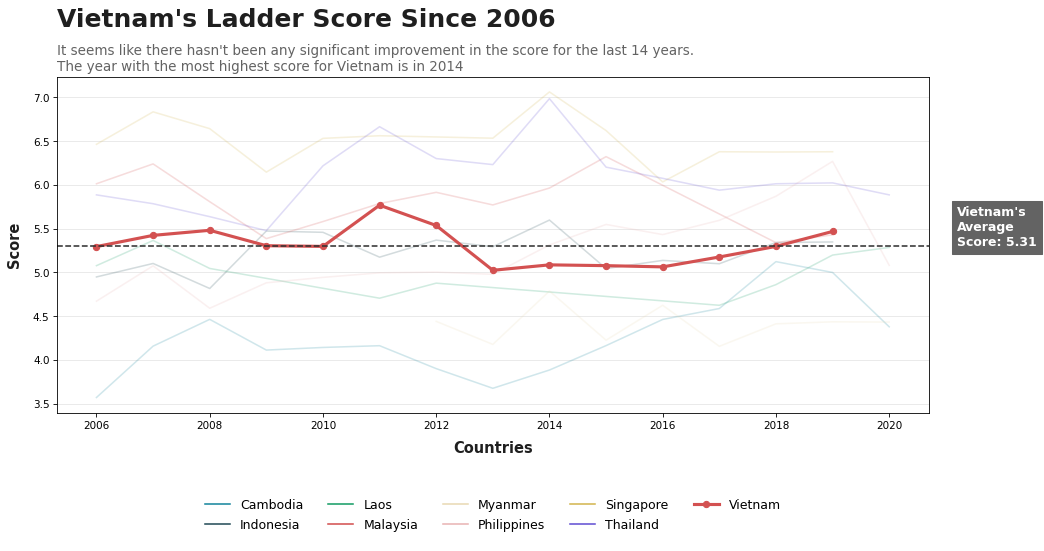

In [61]:
#@title
df = data[data['Country name'].isin(SEA)].set_index('Country name')
df_idn = df.loc['Vietnam']
df = df.reset_index()
df = df[df['Country name'] != "Vietnam"]
mean_idn = df_idn['Life Ladder'].mean()

fig, ax = plt.subplots(figsize=(14, 8), dpi=75)

line0 = sns.lineplot(data=df, x='year', y='Life Ladder', hue='Country name', alpha=0.2, ax=ax, palette=colors_mix[:9])
line1 = ax.plot(df_idn.year, df_idn['Life Ladder'], alpha=1, marker='o', color=colors_red[3], linewidth=3, label='Vietnam')
line2 = ax.axhline(mean_idn, linestyle='--', alpha=1, color=colors_dark[1])


ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=5, borderpad=1, frameon=False, fontsize=12)
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

avgl  = ax.text(
    s="Vietnam's\nAverage\nScore: {:.2f}".format(mean_idn),
    x=xmax+0.5,
    y=mean_idn,
    backgroundcolor=colors_dark[2],
    fontsize=12,
    fontweight='bold',
    color='white'
)

plt.text(s="Vietnam's Ladder Score Since 2006", ha='left', x=xmin, y=ymax*1.08, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("It seems like there hasn't been any significant improvement in the score for the last 14 years.\nThe year with the most highest score for Vietnam is in 2011", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()

In [51]:
#@title
def getSea(row) : 
    if row['Country name'] == "Vietnam" : 
        return "Vietnam"
    elif row['Country name'] in SEA : 
        return "SEA"
    else : 
        return "Other"

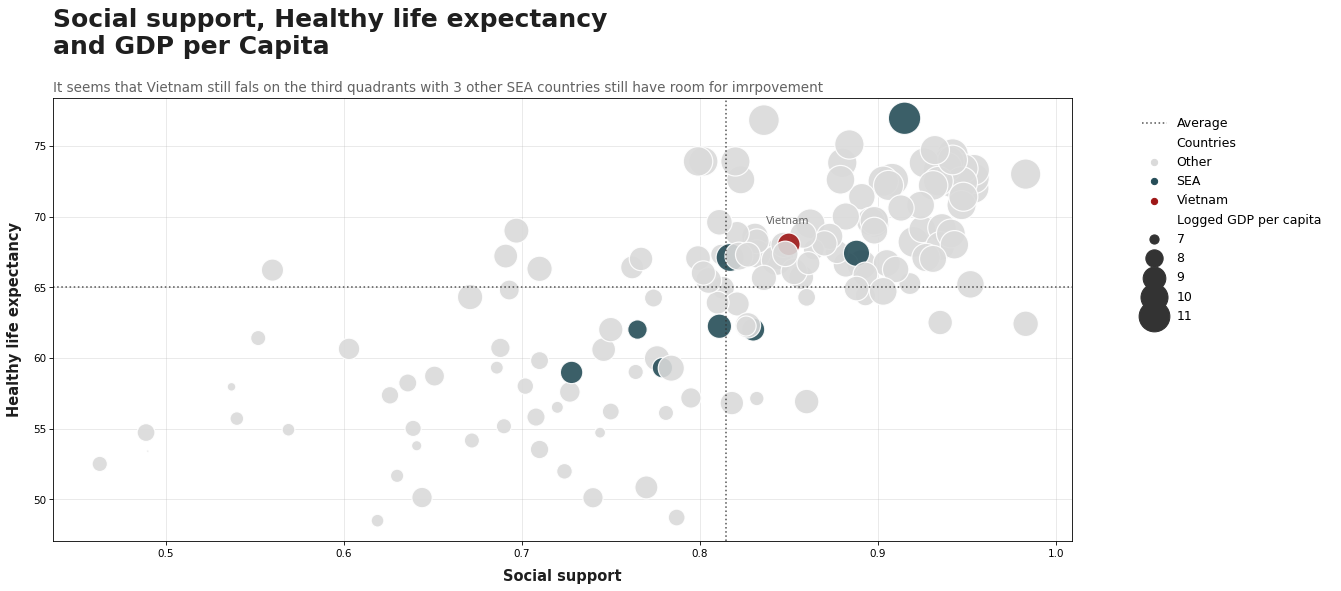

In [52]:
#@title
df = data_2021
df['Countries'] = df.apply(lambda x: getSea(x), axis=1)
meanx=df['Social support'].mean()
meany=df['Healthy life expectancy'].mean()
singx=df[df['Country name'] == 'Vietnam']['Social support']
singy=df[df['Country name'] == 'Vietnam']['Healthy life expectancy']

fig, ax = plt.subplots(figsize=(18, 8), dpi=75)

sns.scatterplot(
    data=df, 
    x='Social support', 
    y='Healthy life expectancy', 
    size='Logged GDP per capita', 
    ax=ax, sizes=(5, 1000),
    alpha=0.9,
    hue='Countries',
    palette=[colors_dark[4], colors_blue[1], colors_red[2]]
)
linex = ax.axvline(meanx, linestyle='dotted', color=colors_dark[1], alpha=0.8, label='Average')
liney = ax.axhline(meany, linestyle='dotted', color=colors_dark[1], alpha=0.8)
text  = ax.text(
    s="Vietnam",
    x=singx-0.013,
    y=singy+1.5,
    color=colors_dark[2]
)


ax.legend(bbox_to_anchor=(1.05, 1), ncol=1, borderpad=1, frameon=False, fontsize=12)
ax.grid(alpha=0.3)
ax.set_axisbelow(True)
ax.set_xlabel("Social support", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Healthy life expectancy", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()


plt.text(s="Social support, Healthy life expectancy\nand GDP per Capita", ha='left', x=xmin, y=ymax*1.04, fontsize=24, fontweight='bold', color=colors_dark[0])
plt.title("It seems that Vietnam still fals on the third quadrants with 3 other SEA countries still have room for imrpovement", loc='left', fontsize=13, color=colors_dark[2])  
plt.tight_layout()
plt.show()